In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pylab as plt
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\artem\AppData\Local\conda\conda\envs\Python2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
RESULT_FILE1 = "result1.txt"
RESULT_FILE2 = "result2.txt"
RESULT_FILE3 = "result3.txt"

In [3]:
def f(x):
    """Function for optimization on interval [1, 30].

    Args:
        x (ndarray).

    """
    return math.sin(x / 5.0) * math.exp(x / 10.0) + 5.0 * math.exp(-x / 2.0)

In [4]:
def h(x):
    """h(f(x)) on interval [1, 30].

    Args:
        x (ndarray).

    """
    return int(f(x))

# Task 1. Minimization of a smooth function

## 5-6.

In [5]:
x0 = 2
bounds = ((1, 30), )
optimization_res = minimize(f, x0, method='BFGS', bounds=bounds)
first_local_min = optimization_res.x[0]
y1 = round(optimization_res.fun, 2)

C:\Users\artem\AppData\Local\conda\conda\envs\Python2\lib\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


## 7

In [6]:
x0 = 30
bounds = ((1, 30), )
optimization_res = minimize(f, x0, method='BFGS', bounds=bounds)
second_local_min = optimization_res.x[0]
y2 = round(optimization_res.fun, 2)

In [7]:
results = map(
    str,
    [y1, y2]
)
with open(RESULT_FILE1, "w") as result:
    result.writelines(" ".join(results))

In [8]:
%%bash
cat result1.txt

1.75 -11.9

# Task 2. Global optimization

In [9]:
bounds = [(1, 30)]
optimization_res = differential_evolution(f, bounds)
y3 = round(optimization_res.fun, 2)

with open(RESULT_FILE2, "w") as result:
    result.writelines(str(y3))

In [10]:
%%bash
cat result2.txt

-11.9

# Task 3. Global optimization (function is stepped)

## 2

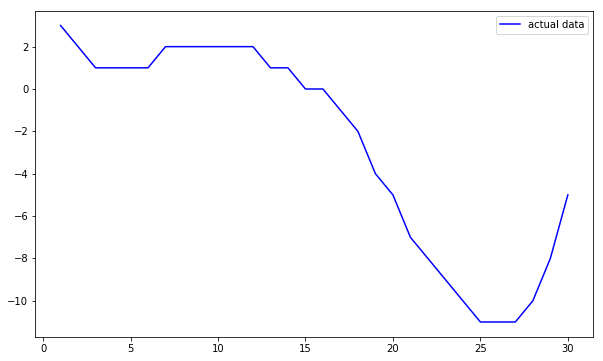

In [11]:
x = range(1, 31)
y = map(h, x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, '-', color = 'b', label='actual data')
plt.legend(loc='best')
plt.show()

## 3

In [12]:
x0 = 30
bounds = ((1, 30), )
optimization_res = minimize(h, x0, method='BFGS', bounds=bounds)
first_local_min = optimization_res.x[0]
y4 = round(optimization_res.fun, 2)

## 4

In [13]:
bounds = [(1, 30)]
optimization_res = differential_evolution(h, bounds)
y5 = round(optimization_res.fun, 2)


In [14]:
results = map(
    str,
    [y4, y5]
)
with open(RESULT_FILE3, "w") as result:
    result.writelines(" ".join(results))

In [15]:
%%bash
cat result3.txt

-5.0 -11.0